In [1]:
import cv2
import numpy as np
import pytesseract
import os
import matplotlib.pyplot as plt

pytesseract.get_tesseract_version()

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

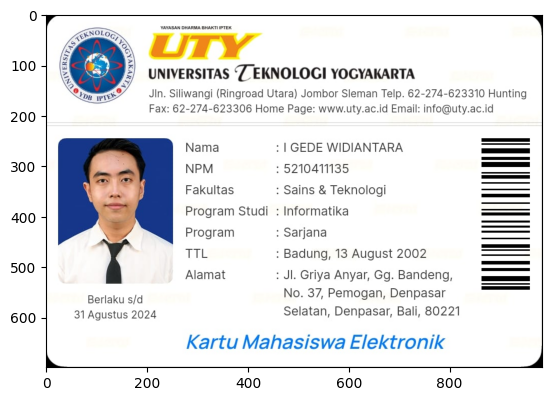

In [2]:
"""
    psm documentation : https://pyimagesearch.com/2021/11/15/tesseract-page-segmentation-modes-psms-explained-how-to-improve-your-ocr-accuracy/
"""

config = '--psm 4 --oem 3'
image = cv2.imread('data/KTM.jpeg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

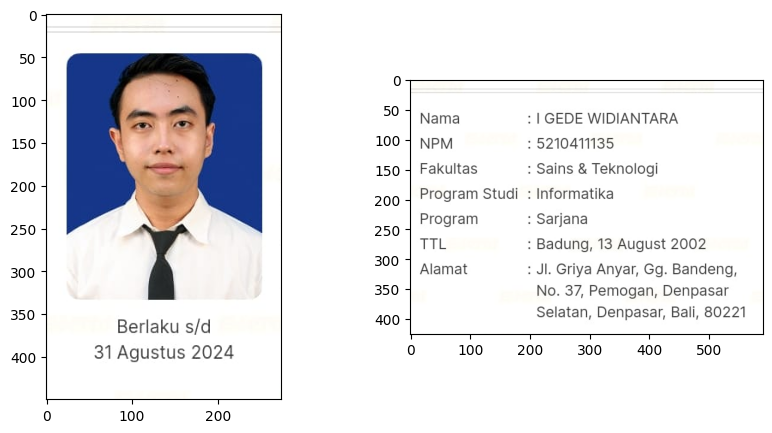

In [3]:
height, width, _ = image.shape
section1 = image[200:650, 0:275]
section2 = image[200:625, 260:850]

# show images in one row
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(section1, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(section2, cv2.COLOR_BGR2RGB))

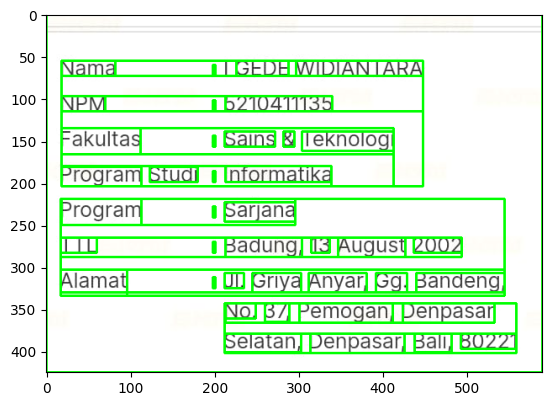

In [4]:
copy = section2.copy()
data = pytesseract.image_to_data(copy, config=config, output_type=pytesseract.Output.DICT)
for i in range(len(data['text'])):
    x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
    cv2.rectangle(copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # cv2.putText(copy, data['text'][i], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(copy, cv2.COLOR_BGR2RGB))

In [5]:
text = pytesseract.image_to_string(section2, config=config)
print(text)

Nama : |GEDE WIDIANTARA
NPM : 5210411135

Fakultas : Sains & Teknologi
Program Studi : Informatika

Program : Sarjana
TTL : Badung, 13 August 2002
Alamat : JI. Griya Anyar, Gg. Bandeng,

No. 37, Pemogan, Denpasar
Selatan, Denpasar, Bali, 80221



In [6]:
# text processing
import re

# split text by new line
lines = text.split('\n')

# remove empty lines
lines = [line for line in lines if len(line) > 0]

# remove special characters
lines = [re.sub(r'\W', ' ', line) for line in lines]

# remove leading and trailing white spaces
lines = [line.strip() for line in lines]

# remove empty double spaces
lines = [re.sub(r' +', ' ', line) for line in lines]

for line in lines:
    print(line)

Nama GEDE WIDIANTARA
NPM 5210411135
Fakultas Sains Teknologi
Program Studi Informatika
Program Sarjana
TTL Badung 13 August 2002
Alamat JI Griya Anyar Gg Bandeng
No 37 Pemogan Denpasar
Selatan Denpasar Bali 80221


In [7]:
data = {}
data['Nama'] = lines[0].split('Nama ')[1]
data['NPM'] = lines[1].split('NPM ')[1]
data['Fakultas'] = lines[2].split('Fakultas ')[1]
data['Program Studi'] = lines[3].split('Program Studi ')[1]
data['TTL'] = lines[5].split('TTL ')[1]
alamat_lines = lines[6:]
alamat_lines[0] = alamat_lines[0].split('Alamat ')[1]
data['Alamat'] = ' '.join(alamat_lines)

print(data)

{'Nama': 'GEDE WIDIANTARA', 'NPM': '5210411135', 'Fakultas': 'Sains Teknologi', 'Program Studi': 'Informatika', 'TTL': 'Badung 13 August 2002', 'Alamat': 'JI Griya Anyar Gg Bandeng No 37 Pemogan Denpasar Selatan Denpasar Bali 80221'}
